<a href="https://colab.research.google.com/github/zeynepsahin2/dsa210-sleep-quality/blob/main/sleep_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...
Preprocessing data...
Running EDA...

=== BASIC DESCRIPTIVE STATISTICS ===
                    count                 mean                  min  \
date                   20  2025-11-11 12:00:00  2025-11-02 00:00:00   
carb_g               20.0                 83.4                 28.0   
protein_g            20.0                86.45                 50.0   
fat_g                20.0                46.65                 19.0   
water_liters         20.0                2.475                  1.5   
temperature_C        20.0               16.575                 12.0   
exercise_done        20.0                  0.6                  0.0   
sleep_duration_h     20.0               7.1905                 4.69   
sleep_quality_1_10   20.0                 7.45                  4.0   
last_meal_time_hour  20.0            19.929167                 18.0   
late_meal            20.0                  0.1                  0.0   

                                     25%                

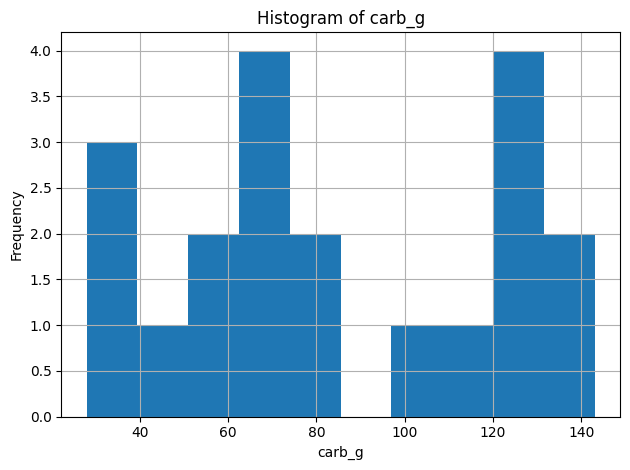

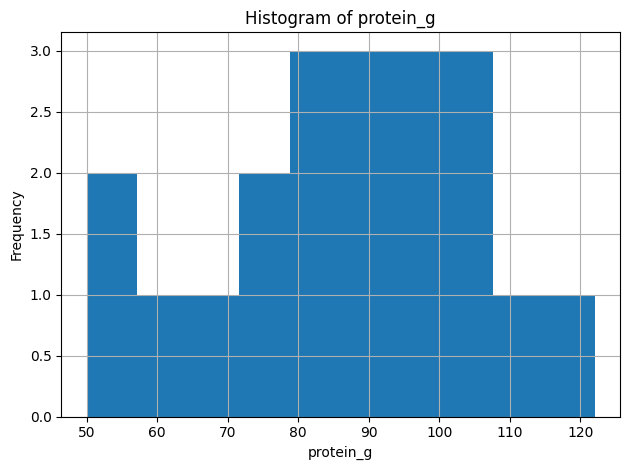

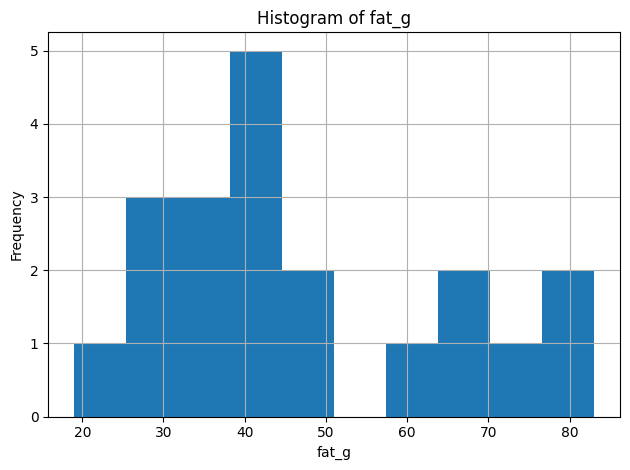

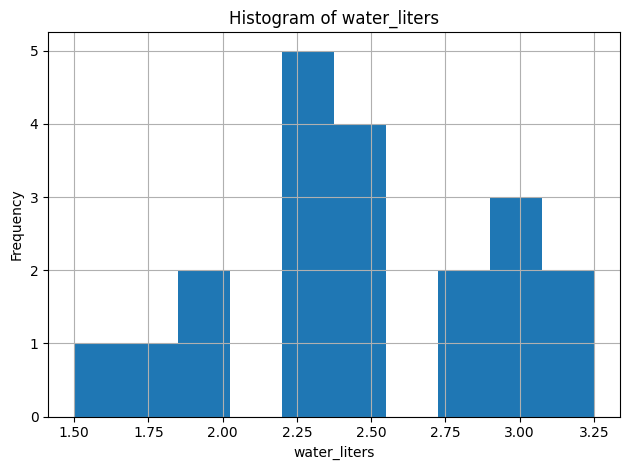

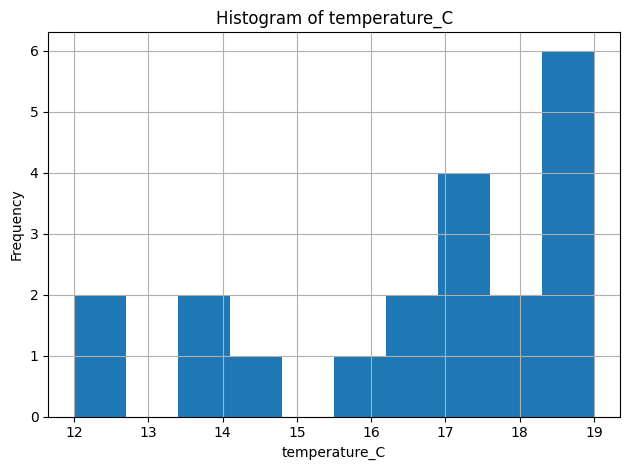

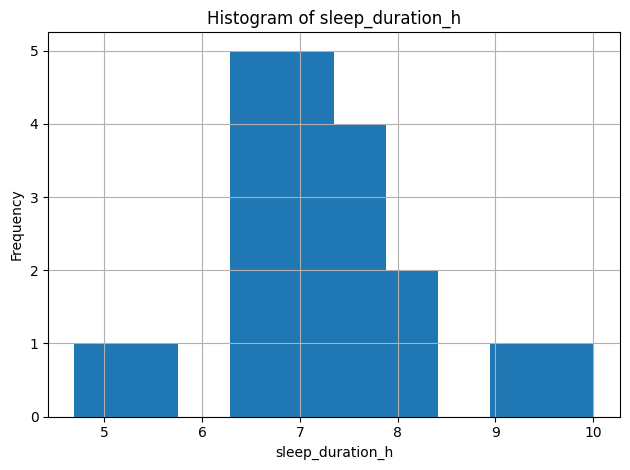

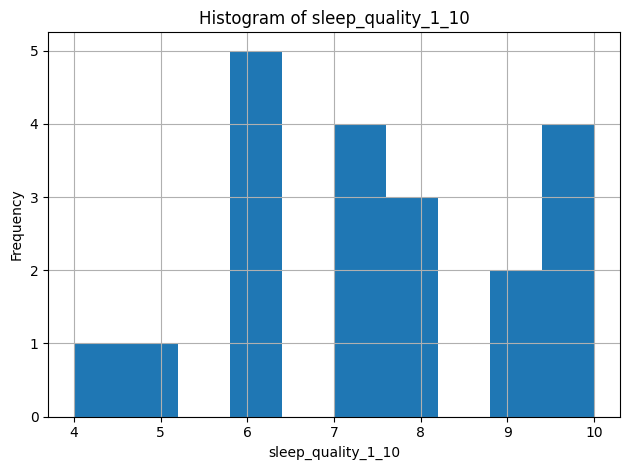

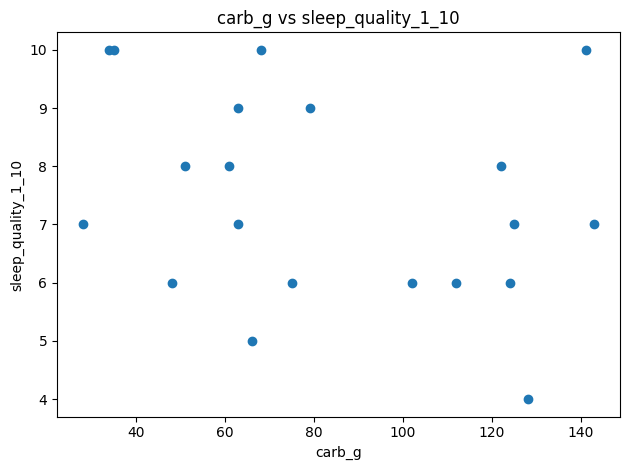

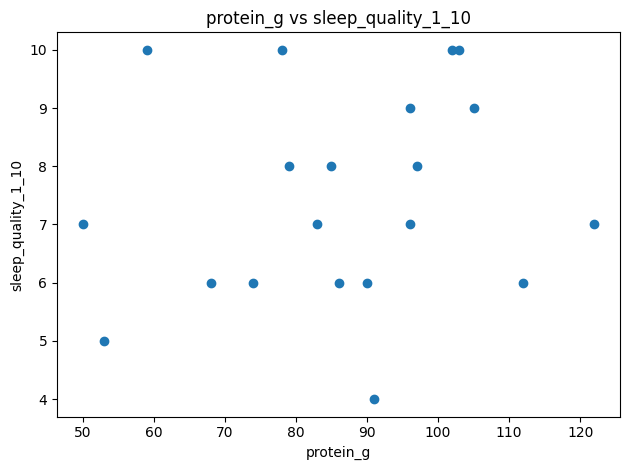

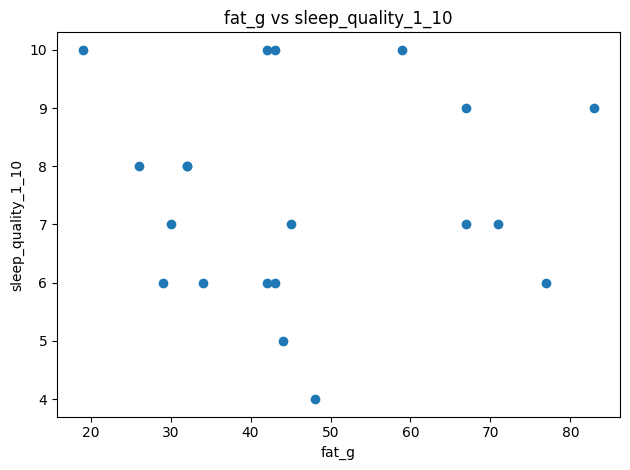

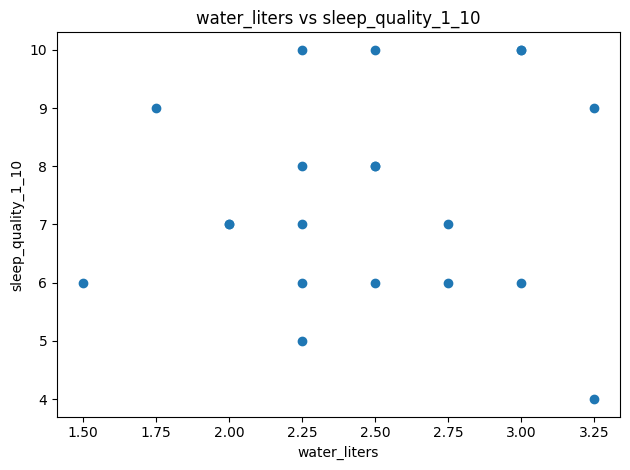

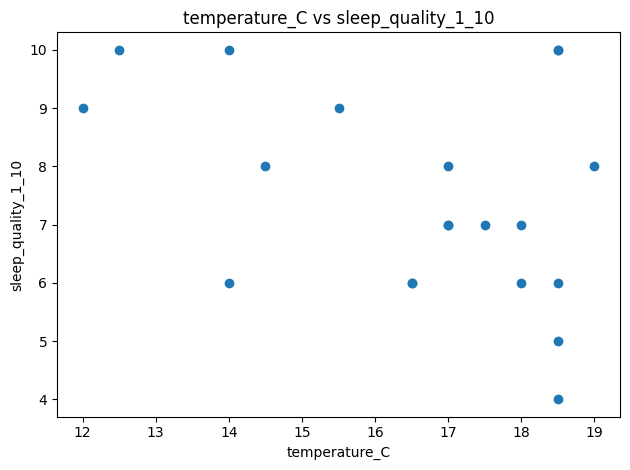

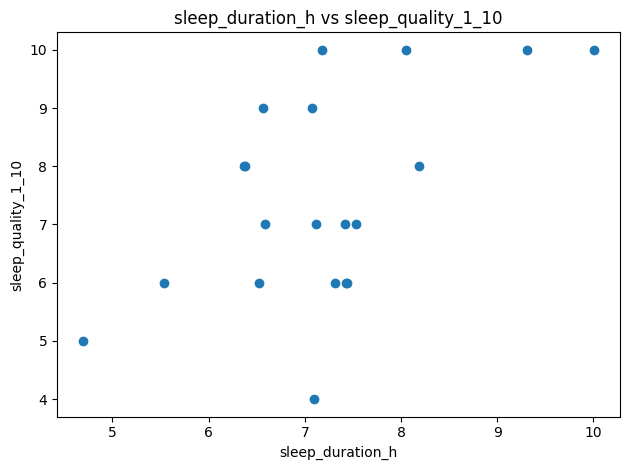

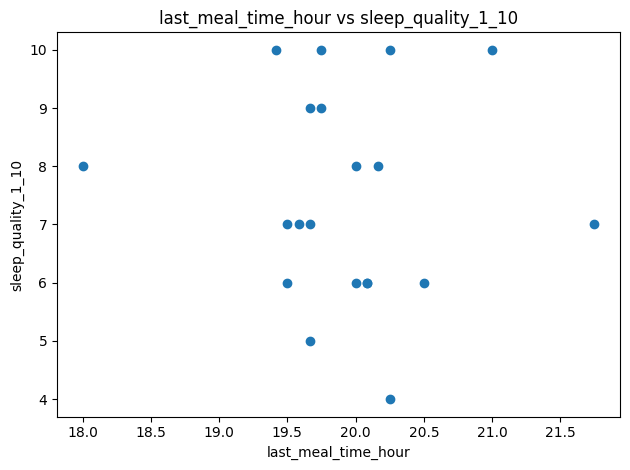


=== CORRELATION MATRIX ===
                       carb_g  protein_g     fat_g  water_liters  \
carb_g               1.000000   0.298882  0.063397      0.283159   
protein_g            0.298882   1.000000  0.457178      0.107608   
fat_g                0.063397   0.457178  1.000000      0.151656   
water_liters         0.283159   0.107608  0.151656      1.000000   
temperature_C        0.491630  -0.018332 -0.149687     -0.010962   
exercise_done       -0.129974   0.386789 -0.091101     -0.207604   
sleep_duration_h     0.169687   0.250787 -0.157310      0.313023   
sleep_quality_1_10  -0.292732   0.156744  0.003479      0.059793   
last_meal_time_hour  0.508045   0.439999 -0.106641      0.010487   
late_meal            0.449890   0.242451 -0.275878      0.107058   

                     temperature_C  exercise_done  sleep_duration_h  \
carb_g                    0.491630      -0.129974          0.169687   
protein_g                -0.018332       0.386789          0.250787   
fat_g     

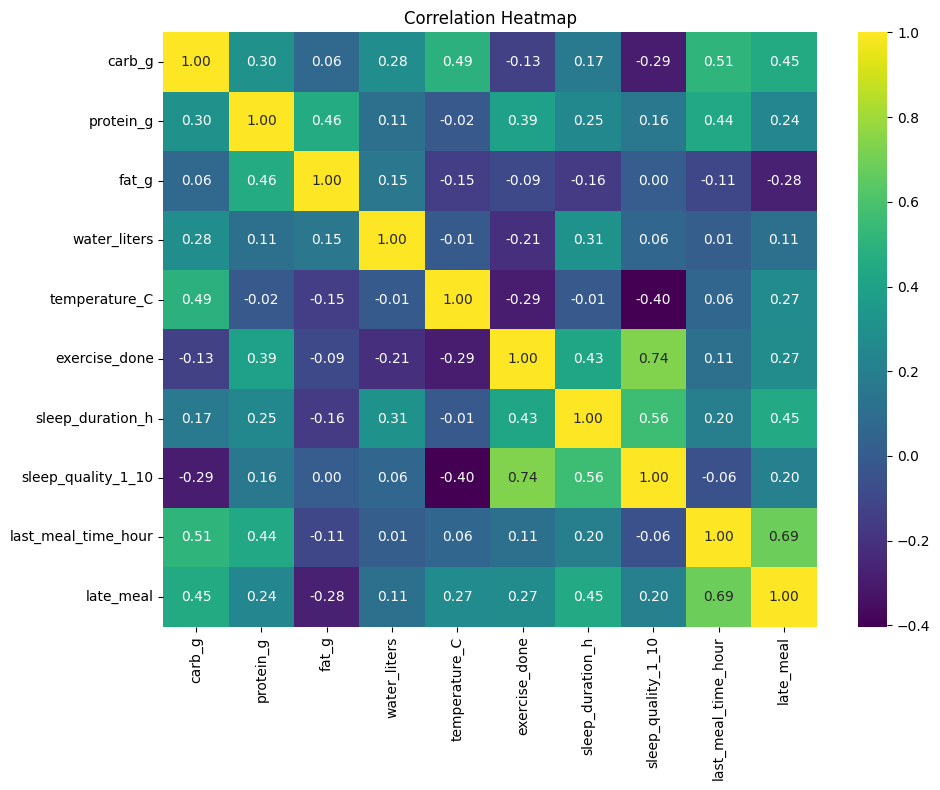

Running hypothesis tests...

=== H2: Late Meal vs Sleep Duration ===
Mean sleep duration (late_meal=1): 8.71
Mean sleep duration (late_meal=0): 7.02
T-test: t = 1.286, p = 0.4102
Mann-Whitney U: U = 30.000, p = 0.1684

=== H3: Carbs vs Sleep Quality ===
Carbs vs Sleep Quality - Pearson r = -0.293, p = 0.2104
Carbs vs Sleep Quality - Spearman rho = -0.272, p = 0.2466

=== H4: Exercise vs Sleep Quality ===
Mean sleep quality (exercise_done=1): 8.50
Mean sleep quality (exercise_done=0): 5.88
T-test: t = 4.944, p = 0.0001
Mann-Whitney U: U = 90.000, p = 0.0011

Analysis complete.


In [ ]:
"""
DSA210 Sleep & Nutrition Project- Zeynep Şahin
EDA and Hypothesis Testing


1. Loads the daily sleep & nutrition dataset from a CSV file.
2. Cleans and preprocesses the data.
3. Performs exploratory data analysis (EDA).
4. Runs hypothesis tests as described in the project proposal.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr



# CSV file name
DATA_PATH = "sleep_quality.csv"
RANDOM_SEED = 42


# Data Loading and Preprocessing

def load_data(path: str) -> pd.DataFrame: #Load the CSV file into a pandas DataFrame

    df = pd.read_csv(path)
    return df


def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:

    #Preprocess the raw DataFrame:
    #- Convert date to datetime.
    #- Convert last_meal_time (HH:MM) to numeric hour.
    #- Convert numeric columns to float.
    #- Create derived features (e.g., late_meal).
    #- Handle missing numeric values with median.

    # date to datetime
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")

    # last_meal_time "HH:MM" -> hour as float
    if "last_meal_time" in df.columns:
        time_parsed = pd.to_datetime(
            df["last_meal_time"], format="%H:%M", errors="coerce"
        )
        df["last_meal_time_hour"] = (
            time_parsed.dt.hour + time_parsed.dt.minute / 60.0
        )
    else:
        df["last_meal_time_hour"] = np.nan

    # numeric columns (if they exist)
    numeric_cols = [
        "carb_g",
        "protein_g",
        "fat_g",
        "water_liters",
        "temperature_C",
        "sleep_duration_h",
        "sleep_quality_1_10",

    ]

    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # binary columns (0/1)
    if "exercise_done" in df.columns:
        df["exercise_done"] = (
            pd.to_numeric(df["exercise_done"], errors="coerce")
            .fillna(0)
            .astype(int)
        )


    # derived feature: late_meal (1 if last_meal_time_hour >= 21)
    df["late_meal"] = np.where(df["last_meal_time_hour"] >= 21, 1, 0)

    # median imputation for all numeric columns
    numeric_for_imputation = df.select_dtypes(include=[np.number]).columns
    for col in numeric_for_imputation:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

    return df


# EDA

def run_basic_descriptives(df: pd.DataFrame) -> None:
    """Print basic descriptive statistics."""
    print("\n=== BASIC DESCRIPTIVE STATISTICS ===")
    print(df.describe().T)


def plot_histograms(df: pd.DataFrame) -> None:
    """Plot histograms for selected numeric columns."""
    cols = [
        "carb_g",
        "protein_g",
        "fat_g",
        "water_liters",
        "temperature_C",
        "sleep_duration_h",
        "sleep_quality_1_10",
    ]
    for col in cols:
        if col not in df.columns:
            continue
        plt.figure()
        df[col].hist(bins=10)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str) -> None:
    """Scatter plot between two variables."""
    if x_col not in df.columns or y_col not in df.columns:
        return
    plt.figure()
    plt.scatter(df[x_col], df[y_col])
    plt.title(f"{x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()


def plot_correlation_heatmap(df: pd.DataFrame) -> None:
    """Compute and plot a correlation heatmap for numeric variables."""
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()
    print("\n=== CORRELATION MATRIX ===")
    print(corr_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()


def run_eda(df: pd.DataFrame) -> None:
    """Run the EDA pipeline."""
    run_basic_descriptives(df)
    plot_histograms(df)

    # Key scatter plots: nutrition vs sleep_quality
    for col in ["carb_g", "protein_g", "fat_g", "water_liters", "temperature_C"]:
        if col in df.columns:
            plot_scatter(df, col, "sleep_quality_1_10")

    # Sleep duration vs sleep quality
    plot_scatter(df, "sleep_duration_h", "sleep_quality_1_10")

    # Last meal time vs sleep quality
    plot_scatter(df, "last_meal_time_hour", "sleep_quality_1_10")

    # Correlation heatmap
    plot_correlation_heatmap(df)



# Hypothesis Tests


def test_late_meal_effect(df: pd.DataFrame) -> None:
    """
    H2: Eating later in the evening reduces sleep duration.
    Compare late_meal = 1 vs 0 on sleep_duration_h.
    """
    if "sleep_duration_h" not in df.columns:
        print("\n[H2] Missing 'sleep_duration_h'.")
        return

    print("\n=== H2: Late Meal vs Sleep Duration ===")
    late = df[df["late_meal"] == 1]["sleep_duration_h"]
    early = df[df["late_meal"] == 0]["sleep_duration_h"]

    print(f"Mean sleep duration (late_meal=1): {late.mean():.2f}")
    print(f"Mean sleep duration (late_meal=0): {early.mean():.2f}")

    t_stat, t_p = ttest_ind(late, early, equal_var=False)
    print(f"T-test: t = {t_stat:.3f}, p = {t_p:.4f}")

    u_stat, u_p = mannwhitneyu(late, early, alternative="two-sided")
    print(f"Mann-Whitney U: U = {u_stat:.3f}, p = {u_p:.4f}")


def test_macros_vs_sleep_quality(df: pd.DataFrame) -> None:
    """
    H3: Higher carbohydrate intake is associated with lower sleep quality.
    Pearson and Spearman correlations between carb_g and sleep_quality_1_10.
    """
    if "carb_g" not in df.columns or "sleep_quality_1_10" not in df.columns:
        print("\n[H3] Missing 'carb_g' or 'sleep_quality_1_10'.")
        return

    print("\n=== H3: Carbs vs Sleep Quality ===")
    x = df["carb_g"]
    y = df["sleep_quality_1_10"]

    pear_r, pear_p = pearsonr(x, y)
    spear_r, spear_p = spearmanr(x, y)
    print(f"Carbs vs Sleep Quality - Pearson r = {pear_r:.3f}, p = {pear_p:.4f}")
    print(f"Carbs vs Sleep Quality - Spearman rho = {spear_r:.3f}, p = {spear_p:.4f}")




def test_exercise_effect(df: pd.DataFrame) -> None:
    """
    H4: Sleep quality is higher on days with physical activity.
    Compare exercise_done = 1 vs 0 on sleep_quality_1_10.
    """
    if "exercise_done" not in df.columns or "sleep_quality_1_10" not in df.columns:
        print("\n[H4] Missing 'exercise_done' or 'sleep_quality_1_10'.")
        return

    print("\n=== H4: Exercise vs Sleep Quality ===")
    active = df[df["exercise_done"] == 1]["sleep_quality_1_10"]
    inactive = df[df["exercise_done"] == 0]["sleep_quality_1_10"]

    print(f"Mean sleep quality (exercise_done=1): {active.mean():.2f}")
    print(f"Mean sleep quality (exercise_done=0): {inactive.mean():.2f}")

    t_stat, t_p = ttest_ind(active, inactive, equal_var=False)
    print(f"T-test: t = {t_stat:.3f}, p = {t_p:.4f}")

    u_stat, u_p = mannwhitneyu(active, inactive, alternative="two-sided")
    print(f"Mann-Whitney U: U = {u_stat:.3f}, p = {u_p:.4f}")


def run_hypothesis_tests(df: pd.DataFrame) -> None:
    """Run all hypothesis tests."""
    test_late_meal_effect(df)
    test_macros_vs_sleep_quality(df)
    test_exercise_effect(df)



# Main

def main():
    """Main entry point."""
    print("Loading data...")
    df = load_data(DATA_PATH)

    print("Preprocessing data...")
    df = preprocess_data(df)

    print("Running EDA...")
    run_eda(df)

    print("Running hypothesis tests...")
    run_hypothesis_tests(df)

    print("\nAnalysis complete.")


if __name__ == "__main__":
    main()
